# Usage (quick version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
import warnings

In [3]:
import covsirphy as cs
cs.__version__

'2.7.3-alpha.new.202.203.206'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/


Detailed citaition list:

Australian Bureau of Statistics (2019), https://www.abs.gov.au/
CIA - Central Intelligence Agency (2018), https://www.cia.gov/
CIA - Central Intelligence Agency (2019), https://www.cia.gov/
CIA - Central Intelligence Agency (2020), https://www.cia.gov/
COVID-19 Peru Data Repository (2019), https://github.com/
COVID-19 Peru Data Repository (2020), https://github.com/
COVID-19 Turkey API (2020), https://github.com/
COVID-19_plus_Russia GitHub repository (2020), https://github.com/
COVID19-India API (2020), https://www.covid19india.org/
Canada's National Statistical Agency (2020), https://www150.statcan.gc.ca/
Centre of Excellence in Economics and Data Science, University of Milano (2020), https://github.com/
Covid19data.com.au (2020), https://github.com/
Czech Statistical Office (2018), https://www.czso.cz/
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be/
Eurostat (

### The number of cases (JHU style)

In [5]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [6]:
print(data_loader.covid19dh_citation)

Australian Bureau of Statistics (2019), https://www.abs.gov.au/
CIA - Central Intelligence Agency (2018), https://www.cia.gov/
CIA - Central Intelligence Agency (2019), https://www.cia.gov/
CIA - Central Intelligence Agency (2020), https://www.cia.gov/
COVID-19 Peru Data Repository (2019), https://github.com/
COVID-19 Peru Data Repository (2020), https://github.com/
COVID-19 Turkey API (2020), https://github.com/
COVID-19_plus_Russia GitHub repository (2020), https://github.com/
COVID19-India API (2020), https://www.covid19india.org/
Canada's National Statistical Agency (2020), https://www150.statcan.gc.ca/
Centre of Excellence in Economics and Data Science, University of Milano (2020), https://github.com/
Covid19data.com.au (2020), https://github.com/
Czech Statistical Office (2018), https://www.czso.cz/
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be/
Eurostat (

In [7]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
189505,2020-08-23,14,11,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
189506,2020-08-24,14,11,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
189507,2020-08-25,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
189508,2020-08-26,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
189509,2020-08-27,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [8]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
189505,2020-08-23,Colombia,Vichada,14,3,0,11
189506,2020-08-24,Colombia,Vichada,14,3,0,11
189507,2020-08-25,Colombia,Vichada,14,2,0,12
189508,2020-08-26,Colombia,Vichada,14,2,0,12
189509,2020-08-27,Colombia,Vichada,14,2,0,12


In [9]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
157,2020-08-23,19333,3421,350,15562
158,2020-08-24,19428,3350,352,15726
159,2020-08-25,19610,3229,354,16027
160,2020-08-26,19846,3129,356,16361
161,2020-08-27,20096,3047,356,16693


In [10]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-08-23,23369127,7497572,809865,15061690,0.017328,0.322256,0.051026
2020-08-24,23581183,7498208,813978,15268997,0.017259,0.323754,0.050611
2020-08-25,23822913,7499781,820334,15502798,0.017217,0.325376,0.050256
2020-08-26,24082365,7541953,826180,15714232,0.017153,0.326260,0.049949
2020-08-27,24083268,7541538,826193,15715537,0.017153,0.326275,0.049946


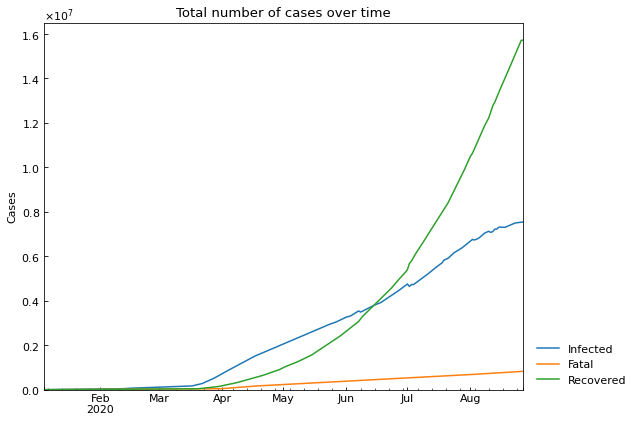

In [11]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [12]:
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
196,2020-08-23,62709,12989,1189,48531
197,2020-08-24,63202,12692,1202,49308
198,2020-08-25,63919,12290,1216,50413
199,2020-08-26,64821,11919,1229,51673
200,2020-08-27,65685,11639,1240,52806


In [13]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan

In [14]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
194,2020-08-23,61747,12021,1176,48550
195,2020-08-24,62507,11986,1181,49340
196,2020-08-25,63121,11494,1196,50431
197,2020-08-26,63822,10925,1209,51688
198,2020-08-27,64668,10619,1226,52823


### Population in each country

In [15]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [16]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
189505,2020-08-23,14,11,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
189506,2020-08-24,14,11,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
189507,2020-08-25,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
189508,2020-08-26,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
189509,2020-08-27,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [17]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
185889,COL,Colombia,Vichada,2020-08-23,107808
185890,COL,Colombia,Vichada,2020-08-24,107808
185891,COL,Colombia,Vichada,2020-08-25,107808
185892,COL,Colombia,Vichada,2020-08-26,107808
185893,COL,Colombia,Vichada,2020-08-27,107808


In [18]:
population_data.value("Japan", province=None)

126529100

In [19]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)

In [20]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [21]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
189505,2020-08-23,14,11,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
189506,2020-08-24,14,11,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
189507,2020-08-25,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
189508,2020-08-26,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
189509,2020-08-27,14,12,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [22]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
189505,2020-08-23,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
189506,2020-08-24,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
189507,2020-08-25,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
189508,2020-08-26,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
189509,2020-08-27,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04


In [23]:
# Subset for a country
oxcgrt_data.subset("Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
232,2020-08-23,1,1,1,0,0,1,1,3,2,2,1,30.56
233,2020-08-24,1,1,1,0,0,1,1,3,2,2,1,30.56
234,2020-08-25,1,1,1,0,0,1,1,3,2,2,1,30.56
235,2020-08-26,1,1,1,0,0,1,1,3,2,2,1,30.56
236,2020-08-27,1,1,1,0,0,1,1,3,2,2,1,30.56


In [24]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset("JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
232,2020-08-23,1,1,1,0,0,1,1,3,2,2,1,30.56
233,2020-08-24,1,1,1,0,0,1,1,3,2,2,1,30.56
234,2020-08-25,1,1,1,0,0,1,1,3,2,2,1,30.56
235,2020-08-26,1,1,1,0,0,1,1,3,2,2,1,30.56
236,2020-08-27,1,1,1,0,0,1,1,3,2,2,1,30.56


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [25]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

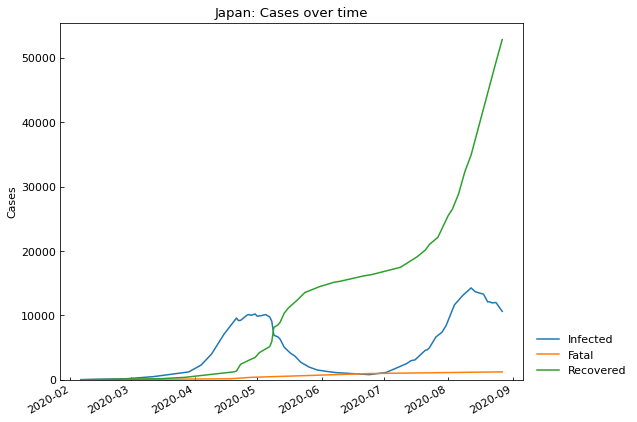

,Date,Confirmed,Infected,Fatal,Recovered
194,2020-08-23,61747,12021,1176,48550
195,2020-08-24,62507,11986,1181,49340
196,2020-08-25,63121,11494,1196,50431
197,2020-08-26,63822,10925,1209,51688
198,2020-08-27,64668,10619,1226,52823


In [26]:
import matplotlib
warnings.simplefilter("ignore", category=matplotlib.MatplotlibDeprecationWarning)
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

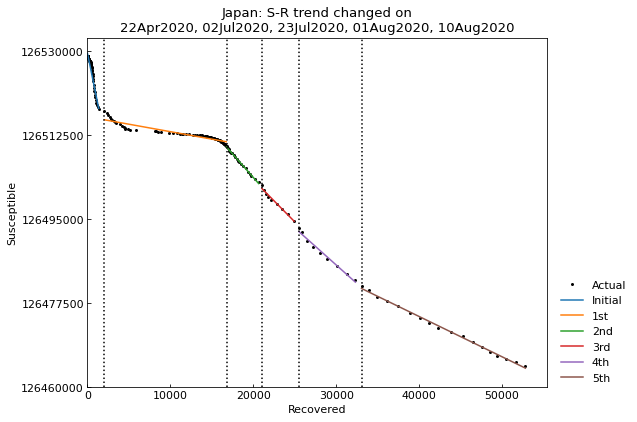

,Type,Start,End,Population
1st,Past,22Apr2020,01Jul2020,126529100
2nd,Past,02Jul2020,22Jul2020,126529100
3rd,Past,23Jul2020,31Jul2020,126529100
4th,Past,01Aug2020,09Aug2020,126529100
5th,Past,10Aug2020,27Aug2020,126529100


In [27]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [28]:
scenario.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	5th phase (10Aug2020 - 27Aug2020): finished 1683 trials in 1 min  0 sec

	3rd phase (23Jul2020 - 31Jul2020): finished  437 trials in 0 min 10 sec

	1st phase (22Apr2020 - 01Jul2020): finished 1841 trials in 1 min  0 sec

	2nd phase (02Jul2020 - 22Jul2020): finished 1922 trials in 1 min  0 sec

	4th phase (01Aug2020 - 09Aug2020): finished 1920 trials in 1 min  0 sec

Completed optimization. Total: 2 min  1 sec

In [29]:
scenario.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/alpha2 [day],1/gamma [day],alpha1 [-],1/beta [day],RMSLE,Trials,Runtime
1st,Past,22Apr2020,01Jul2020,126529100,SIR-F,0.40,0.068739,0.000304,0.007748,0.017608,360,823,14,0.069,32,0.779796,1841,1 min 0 sec
2nd,Past,02Jul2020,22Jul2020,126529100,SIR-F,2.08,0.000220,0.000064,0.036329,0.017436,360,3930,14,0.000,6,0.048241,1922,1 min 0 sec
3rd,Past,23Jul2020,31Jul2020,126529100,SIR-F,1.89,0.001114,0.000046,0.033613,0.017743,360,5456,14,0.001,7,0.036019,437,0 min 10 sec
4th,Past,01Aug2020,09Aug2020,126529100,SIR-F,1.78,0.000054,0.000060,0.028269,0.015850,360,4163,15,0.000,8,0.031578,1920,1 min 0 sec
5th,Past,10Aug2020,27Aug2020,126529100,SIR-F,0.87,0.000198,0.000224,0.020358,0.023153,360,1116,10,0.000,12,0.037834,1683,1 min 0 sec


### Accuracy of estimation

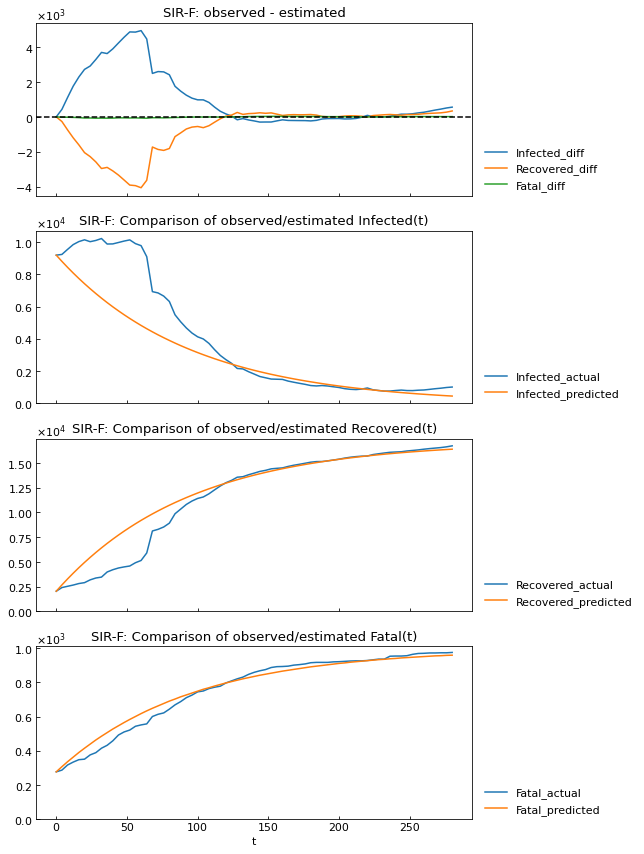

In [30]:
scenario.estimate_accuracy(phase="1st")

### Get parameter value

In [31]:
scenario.get("Rt", phase="4th")

1.78

### Show parameter history

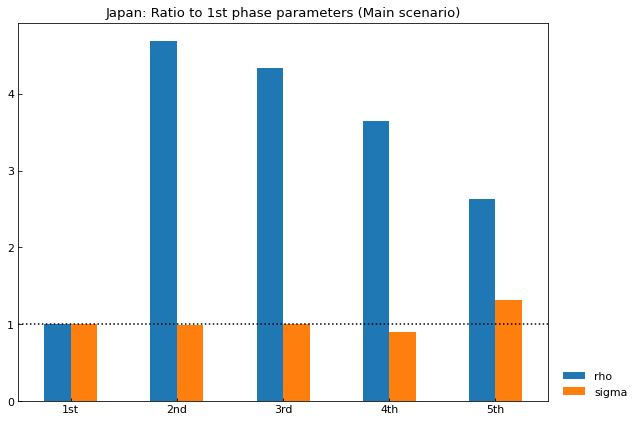

,1st,2nd,3rd,4th,5th
rho,1.0,4.688782,4.338236,3.648569,2.627570
sigma,1.0,0.990208,1.007677,0.900157,1.314891


In [32]:
df = scenario.param_history(targets=["rho", "sigma"])
df.T

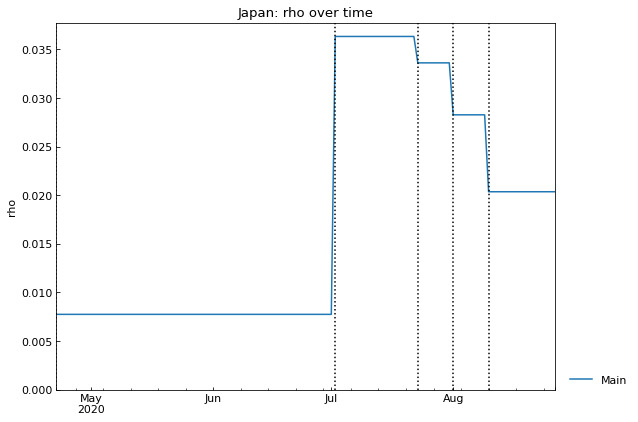

In [33]:
# version >= 2.7.3-alpha
_ = scenario.history(target="rho")

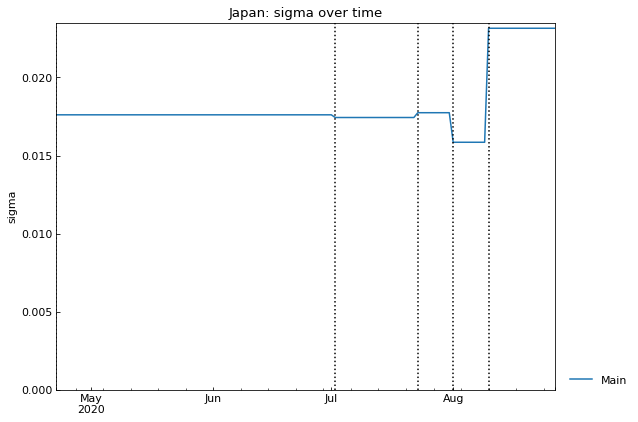

In [34]:
# version >= 2.7.3-alpha
_ = scenario.history(target="sigma")

### Show the history of reproduction number

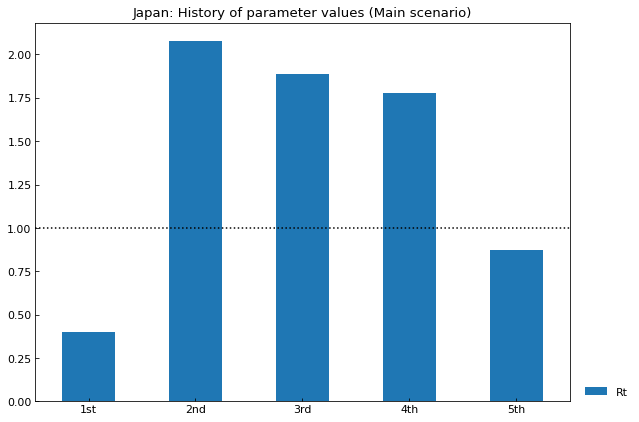

,1st,2nd,3rd,4th,5th
Rt,0.4,2.08,1.89,1.78,0.87


In [35]:
df = scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=True)
df.T

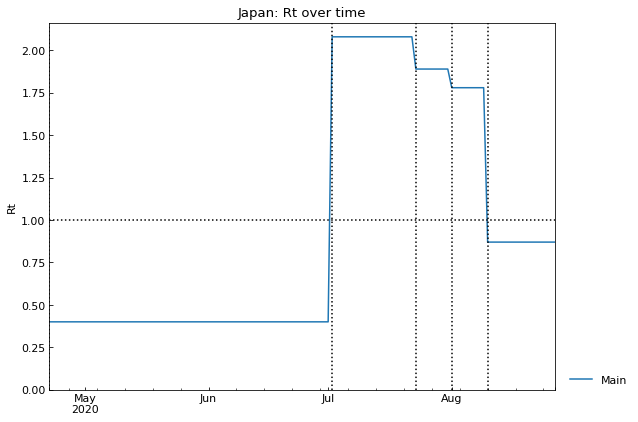

In [36]:
# version >= 2.7.3-alpha
_ = scenario.history(target="Rt")

### Simulate the number of cases

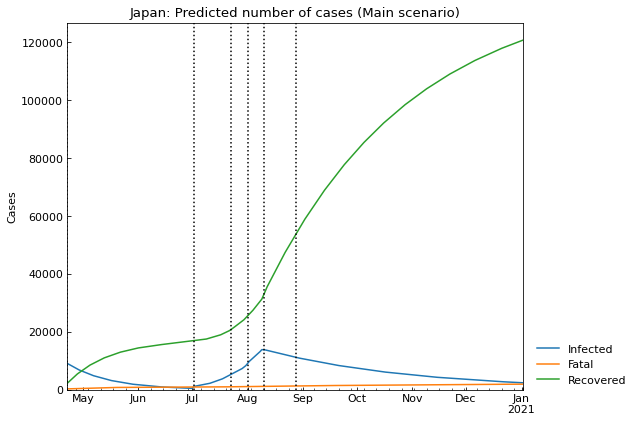

,Date,Confirmed,Fatal,Infected,Recovered
251,2020-12-29,124243,1902,2505,119836
252,2020-12-30,124446,1904,2475,120067
253,2020-12-31,124646,1906,2445,120295
254,2021-01-01,124844,1909,2415,120520
255,2021-01-02,125039,1911,2386,120742


In [37]:
scenario.clear(name="Main")
scenario.add(end_date="01Jan2021", name="Main")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [38]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.02315254732458998

In [39]:
sigma_new = sigma_current * 2
sigma_new

0.04630509464917996

In [40]:
scenario.clear(name="Medicine")
scenario.add(name="Medicine", days=30, sigma=sigma_current)
scenario.add(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     1st      Past  22Apr2020  01Jul2020   126529100  SIR-F  0.40   
         2nd      Past  02Jul2020  22Jul2020   126529100  SIR-F  2.08   
         3rd      Past  23Jul2020  31Jul2020   126529100  SIR-F  1.89   
         4th      Past  01Aug2020  09Aug2020   126529100  SIR-F  1.78   
         5th      Past  10Aug2020  27Aug2020   126529100  SIR-F  0.87   
         6th    Future  28Aug2020  01Jan2021   126529100  SIR-F  0.87   
Medicine 1st      Past  22Apr2020  01Jul2020   126529100  SIR-F  0.40   
         2nd      Past  02Jul2020  22Jul2020   126529100  SIR-F  2.08   
         3rd      Past  23Jul2020  31Jul2020   126529100  SIR-F  1.89   
         4th      Past  01Aug2020  09Aug2020   126529100  SIR-F  1.78   
         5th      Past  10Aug2020  27Aug2020   126529100  SIR-F  0.87   
         6th    Future  28Aug2020  27Sep2020   126529100  SIR-F  0.87   
         7th    Future  28Sep2020  01Jan2021   126529100  SIR-F  0.44   

                   theta     kappa       rho     sigma  tau  1/alpha2 [day]  \
Scenario Phase                                                                
Main     1st    0.068739  0.000304  0.007748  0.017608  360             823   
         2nd    0.000220  0.000064  0.036329  0.017436  360            3930   
         3rd    0.001114  0.000046  0.033613  0.017743  360            5456   
         4th    0.000054  0.000060  0.028269  0.015850  360            4163   
         5th    0.000198  0.000224  0.020358  0.023153  360            1116   
         6th    0.000198  0.000224  0.020358  0.023153  360            1116   
Medicine 1st    0.068739  0.000304  0.007748  0.017608  360             823   
         2nd    0.000220  0.000064  0.036329  0.017436  360            3930   
         3rd    0.001114  0.000046  0.033613  0.017743  360            5456   
         4th    0.000054  0.000060  0.028269  0.015850  360            4163   
         5th    0.000198  0.000224  0.020358  0.023153  360            1116   
         6th    0.000198  0.000224  0.020358  0.023153  360            1116   
         7th    0.000198  0.000224  0.020358  0.046305  360            1116   

                1/gamma [day]  alpha1 [-]  1/beta [day]      RMSLE Trials  \
Scenario Phase                                                              
Main     1st               14       0.069            32   0.779796   1841   
         2nd               14       0.000             6  0.0482408   1922   
         3rd               14       0.001             7  0.0360191    437   
         4th               15       0.000             8  0.0315779   1920   
         5th               10       0.000            12  0.0378342   1683   
         6th               10       0.000            12          -      -   
Medicine 1st               14       0.069            32   0.779796   1841   
         2nd               14       0.000             6  0.0482408   1922   
         3rd               14       0.001             7  0.0360191    437   
         4th               15       0.000             8  0.0315779   1920   
         5th               10       0.000            12  0.0378342   1683   
         6th               10       0.000            12          -      -   
         7th                5       0.000            12          -      -   

                     Runtime  
Scenario Phase                
Main     1st    1 min  0 sec  
         2nd    1 min  0 sec  
         3rd    0 min 10 sec  
         4th    1 min  0 sec  
         5th    1 min  0 sec  
         6th               -  
Medicine 1st    1 min  0 sec  
         2nd    1 min  0 sec  
         3rd    0 min 10 sec  
         4th    1 min  0 sec  
         5th    1 min  0 sec  
         6th               -  
         7th               -

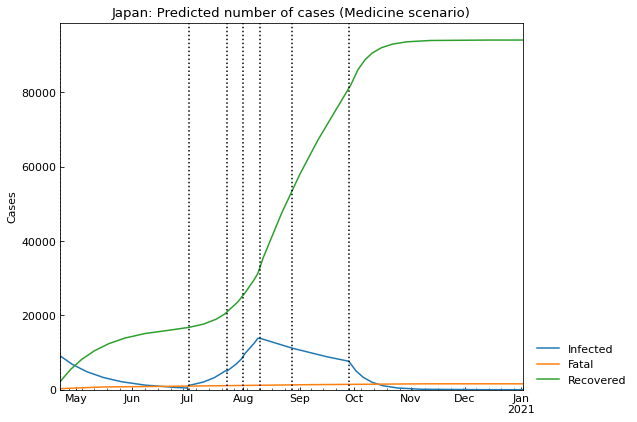

,Date,Confirmed,Fatal,Infected,Recovered
251,2020-12-29,95687,1582,1,94104
252,2020-12-30,95686,1582,0,94104
253,2020-12-31,95686,1582,0,94104
254,2021-01-01,95687,1582,0,94105
255,2021-01-02,95687,1582,0,94105


In [41]:
scenario.simulate(name="Medicine").tail()

### Compare the scenarios

In [42]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 02Jan2021,Fatal on 02Jan2021,7th_Rt
Main,13885,10Aug2020,2386,1911,-
Medicine,13885,10Aug2020,0,1582,0.44


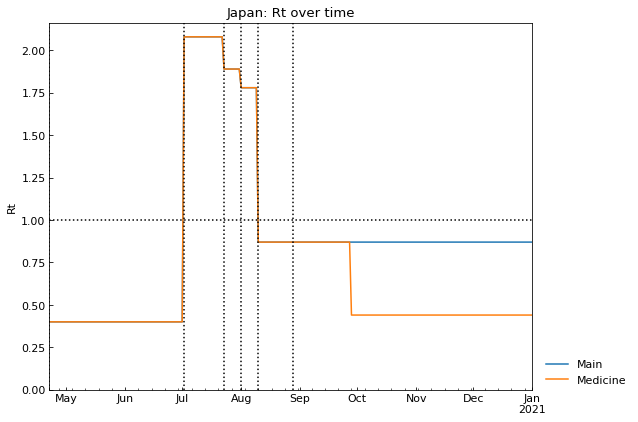

In [43]:
# version >= 2.7.3-alpha
_ = scenario.history(target="Rt")

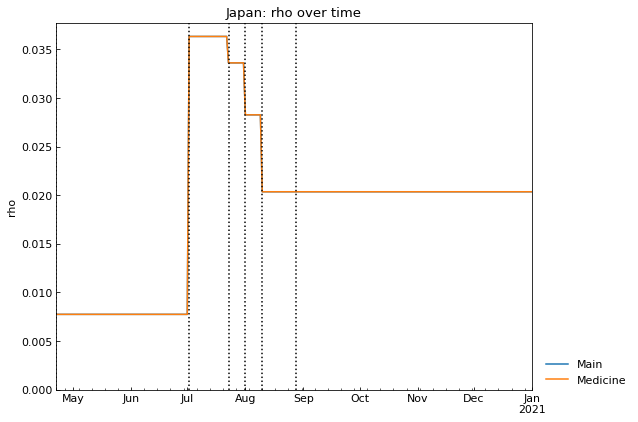

In [44]:
# version >= 2.7.3-alpha
_ = scenario.history(target="rho")

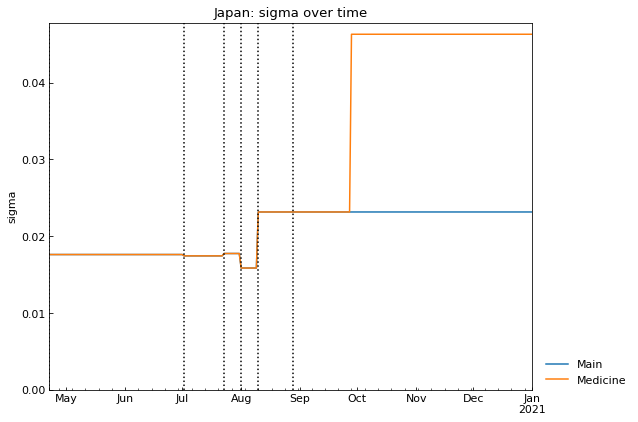

In [45]:
# version >= 2.7.3-alpha
_ = scenario.history(target="sigma")

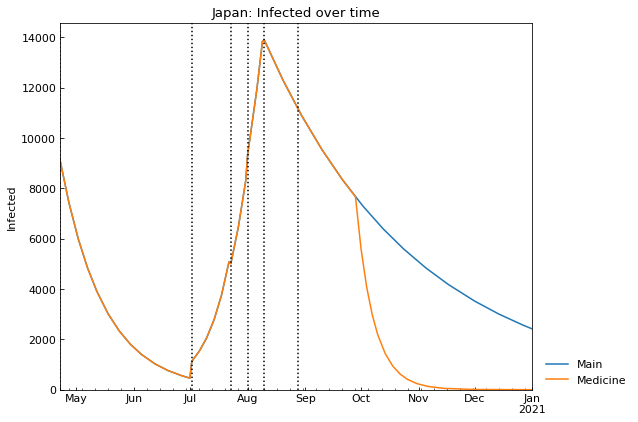

In [46]:
# version >= 2.7.3-alpha
_ = scenario.history(target="Infected")